# Datacamp: Michelin restaurant classification
Authors: *Quentin Garsault, Charles Cuvillier, Lucas Selini, Eric Patarin*

<img src="./img/logo%20michelin.png" alt="Logo michelin" width="300">



## Table of Contents
* [Introduction](#introduction)
* [The dataset](#dataset)
* [Requirements](#requirements)
* [Data exploration](#exploration)
* [Base Model](#Base_Model)

## Introduction <a class="anchor" id="introduction"></a>

In the world of gastronomy, Michelin stars serve as markers of exceptional culinary achievement, indicating not just the quality of food but also the overall dining experience. 

Restaurants are evaluated based on various criteria, including the quality of ingredients, skillful preparation, creativity, and overall dining ambiance. The Michelin Guide meticulously assesses these factors to award restaurants with one, two, or three Michelin stars, signifying varying degrees of excellence.

Our data challenge revolves around predicting the Michelin star rating for restaurants using a dataset that includes culinary and contextual information. By analyzing the features associated with Michelin-starred establishments, we aim to unravel the intricate patterns that contribute to the prestigious recognition. Our challenge seeks to enhance the understanding of the culinary world and provide insights into the factors that elevate a restaurant to Michelin-star status.

## The dataset <a class="anchor" id="dataset"></a>

For this challenge, the data were first preprocessed and then split in order to preserve a private test set on which to evaluate the models on the servers. This leaves 2653 observations in the public train set and 639 observations in the public test set. 

Preprocessing steps before splitting the data:


Glossary of the terms used in the dataset:

## Requirements <a class="anchor" id="requirements"></a>

In [117]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import StratifiedGroupKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
# workflow libraires
from sklearn.base import is_classifier
from sklearn.utils import _safe_indexing
# from ..utils.importing import import_module_from_source

import rampwf as rw

## Download Data

In [118]:
#execute the downlaad_data.py file to get the data. You have to enter your Kaagle username and key. 

# Not executed here because impossible to write your username and key in a notebook

## Data Exploration <a class="anchor" id="exploration"></a>

Firstly,we download all data from train csv file in order to analyse them

In [119]:
# Look on the 5 first rows of the training set
X_train_df=pd.read_csv('./data/michelinstar-restaurants/train.csv')
X_train_df.head()

,name,blurb,michelin_award,city,country,lat,lon,image,chef,cuisine1,cuisine2,url,url2
0,Malathounis,"Run by a friendly husband and wife team, Malth...",ONE_STAR,Kernen im Remstal,Germany,48.793824,9.342388,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Joannis Malathounis,Mediterranean Cuisine,Greek,https://guide.michelin.com/en/baden-wurttember...,https://guide.michelin.com/en/baden-wurttember...
1,Solana,Located next to the Santuario de la Bien Apare...,ONE_STAR,Ampuero,Spain,43.326314,-3.453151,https://mitp-p-001-delivery.sitecorecontenthub...,Ignacio Solana Pérez,Modern Cuisine,NaN,https://guide.michelin.com/en/cantabria/ampuer...,https://guide.michelin.com/en/cantabria/ampuer...
2,Poemas by Hermanos Padrón,A unique culinary experience overseen by the a...,ONE_STAR,Las Palmas de Gran Canaria,Spain,28.121197,-15.427277,https://mitp-p-001-delivery.sitecorecontenthub...,Iciar Pérez,Creative,NaN,https://guide.michelin.com/en/canarias/las-pal...,https://guide.michelin.com/en/canarias/las-pal...
3,Schote,"In Essen's city centre, Nelson Müller proposes...",ONE_STAR,Essen,Germany,51.437828,7.005291,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Nelson Müller,Modern Cuisine,Market Cuisine,https://guide.michelin.com/en/nordrhein-westfa...,https://guide.michelin.com/en/nordrhein-westfa...
4,Seventh Son,The Hong Kong based chain opened this comforta...,ONE_STAR,Shanghai,China Mainland,31.219598,121.460072,https://axwwgrkdco.cloudimg.io/v7/mtp-cf-image...,NaN,Cantonese,NaN,https://guide.michelin.com/en/shanghai-municip...,NaN


Then we look on columns, data types and  missing values

In [120]:
X_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2553 non-null   object 
 1   blurb           2553 non-null   object 
 2   michelin_award  2553 non-null   object 
 3   city            2553 non-null   object 
 4   country         2553 non-null   object 
 5   lat             2553 non-null   float64
 6   lon             2553 non-null   float64
 7   image           2538 non-null   object 
 8   chef            2244 non-null   object 
 9   cuisine1        2553 non-null   object 
 10  cuisine2        662 non-null    object 
 11  url             2553 non-null   object 
 12  url2            2474 non-null   object 
dtypes: float64(2), object(11)
memory usage: 259.4+ KB


<Axes: >

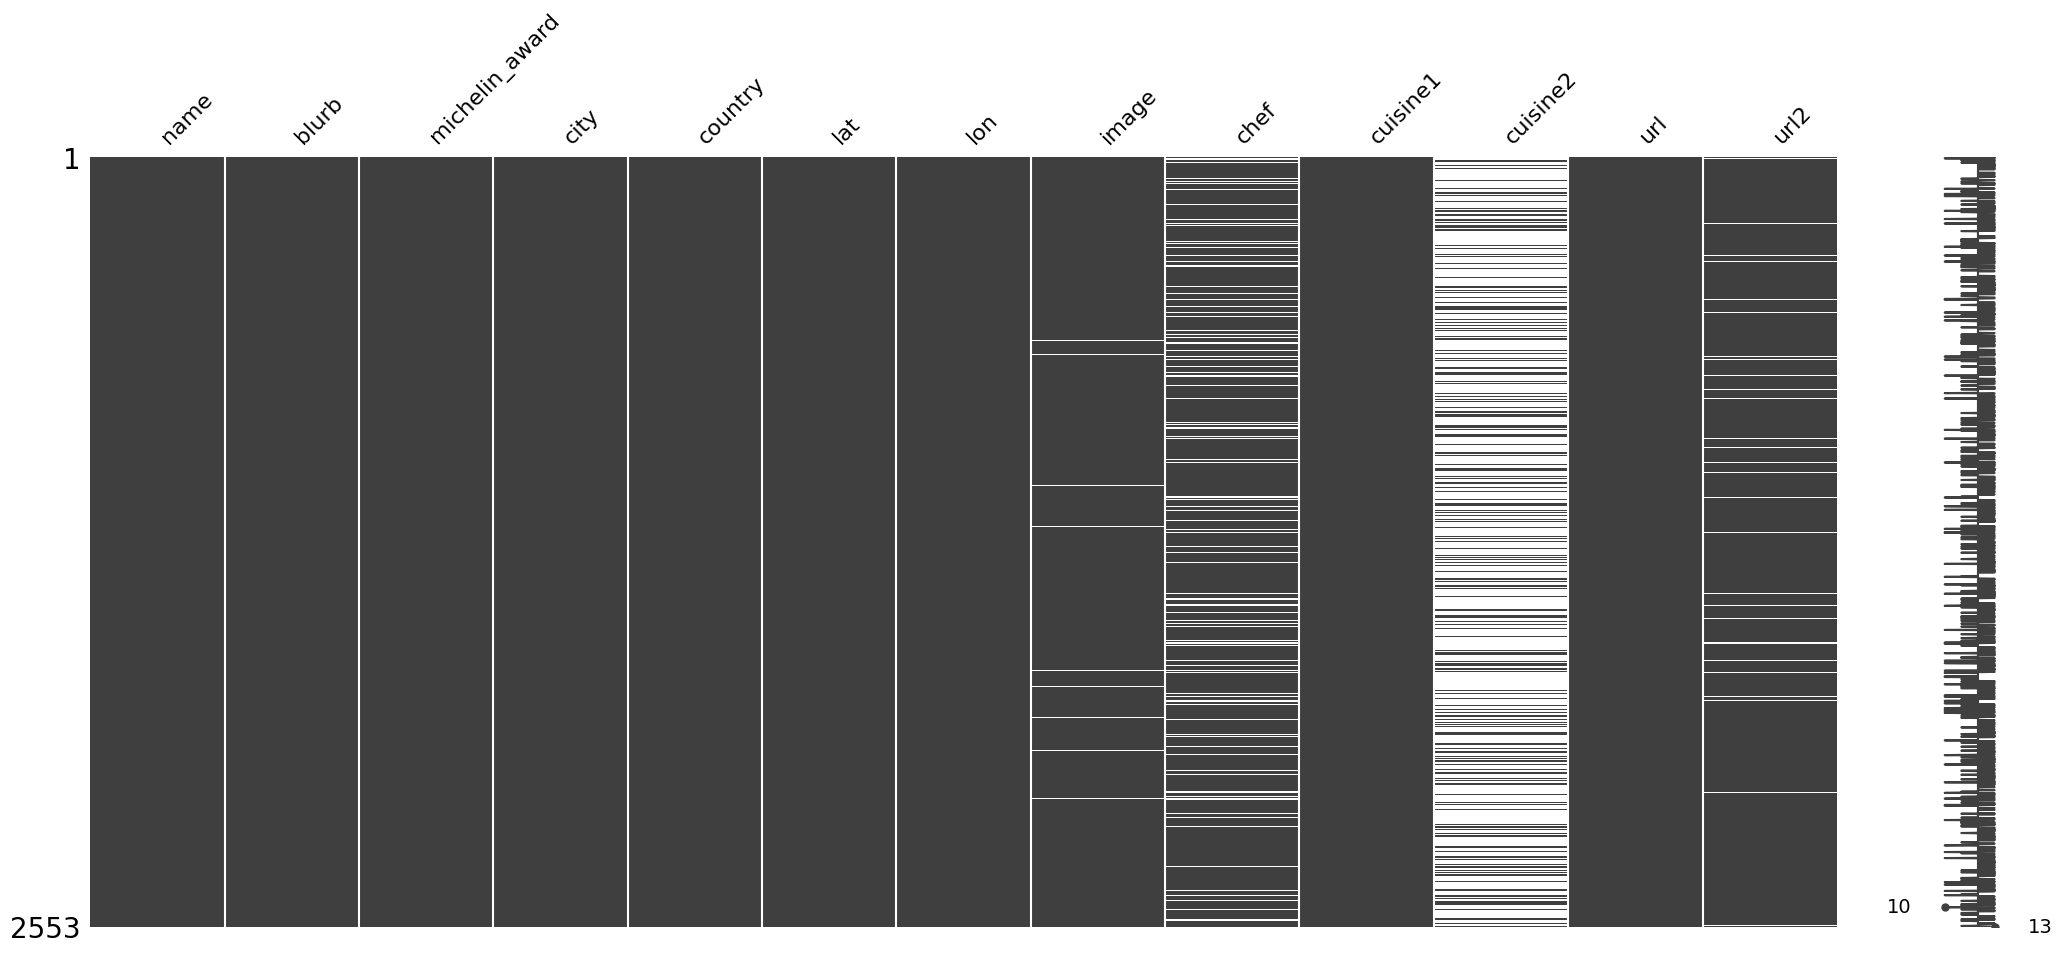

In [121]:
# Matrix to visualize the missing values
msno.matrix(X_train_df)

Now, look on what we want to predict

In [122]:
# how many stars the restaurant have
X_train_df['michelin_award'].unique()

array(['ONE_STAR', 'TWO_STARS', 'THREE_STARS'], dtype=object)

In [123]:
# Repartition of the number of stars

X_train_df['michelin_award'].value_counts()

michelin_award
ONE_STAR       2066
TWO_STARS       379
THREE_STARS     108
Name: count, dtype: int64

Let have a look on the repartition per country

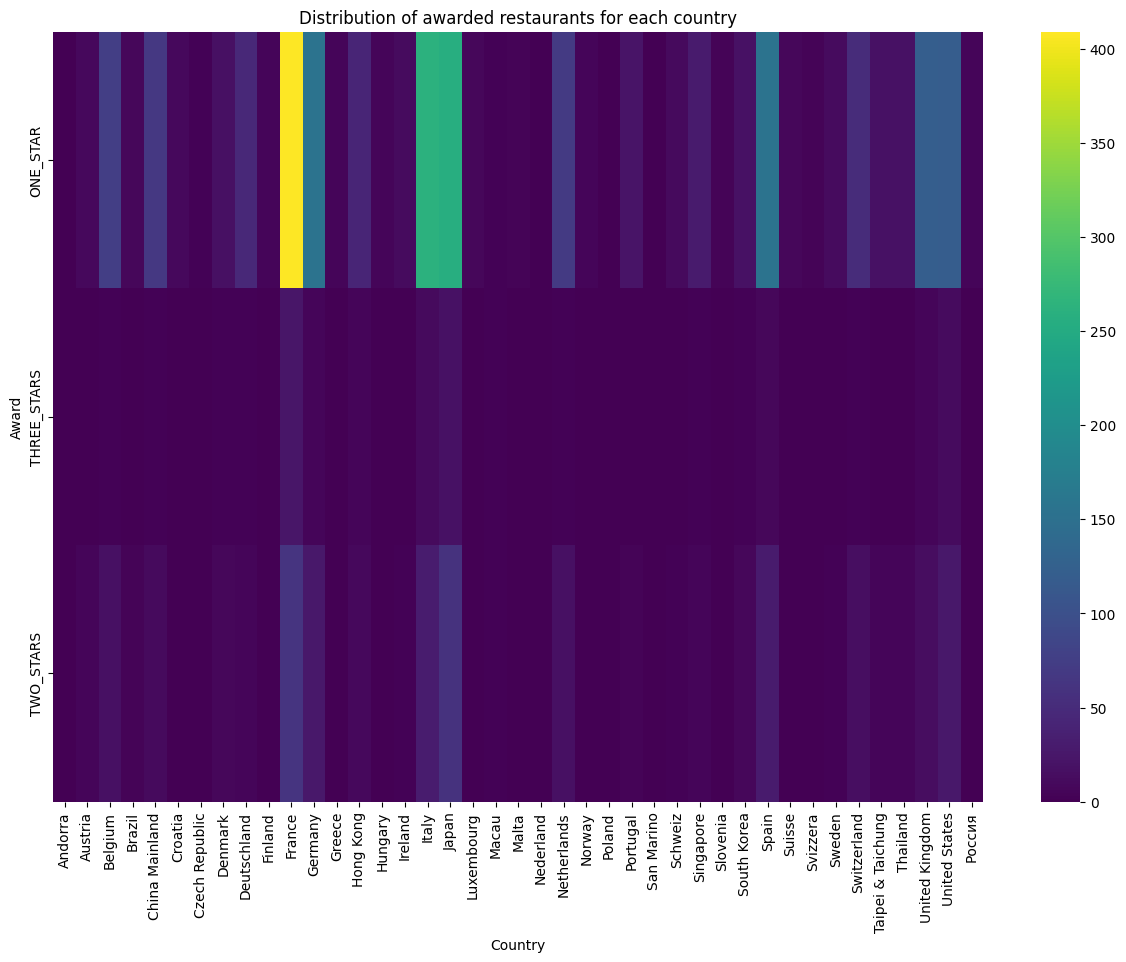

In [124]:
# heatmap of the distribution of groups in each class
plt.figure(figsize=(15, 10))

sns.heatmap(X_train_df.groupby(['michelin_award','country']).size().unstack(fill_value=0), cmap="viridis")
plt.title('Distribution of awarded restaurants for each country')
plt.xlabel('Country')
plt.ylabel('Award')
plt.show()

## Base Model <a class="anchor" id="Base_Model"></a>

In this competition the columns used will be these one:

In [125]:
columns=['name','blurb','city','country','lat','lon','chef','cuisine1','cuisine2']

In [126]:
#Select the data for train 
X_train=pd.read_csv('./data/michelinstar-restaurants/train.csv')
X_train_df=X_train[columns]
X_train_df.head()

,name,blurb,city,country,lat,lon,chef,cuisine1,cuisine2
0,Malathounis,"Run by a friendly husband and wife team, Malth...",Kernen im Remstal,Germany,48.793824,9.342388,Joannis Malathounis,Mediterranean Cuisine,Greek
1,Solana,Located next to the Santuario de la Bien Apare...,Ampuero,Spain,43.326314,-3.453151,Ignacio Solana Pérez,Modern Cuisine,NaN
2,Poemas by Hermanos Padrón,A unique culinary experience overseen by the a...,Las Palmas de Gran Canaria,Spain,28.121197,-15.427277,Iciar Pérez,Creative,NaN
3,Schote,"In Essen's city centre, Nelson Müller proposes...",Essen,Germany,51.437828,7.005291,Nelson Müller,Modern Cuisine,Market Cuisine
4,Seventh Son,The Hong Kong based chain opened this comforta...,Shanghai,China Mainland,31.219598,121.460072,NaN,Cantonese,NaN


In [127]:
#Select the data for test
X_test=pd.read_csv('./data/michelinstar-restaurants/test.csv')
X_test_df=X_test[columns]
X_test_df.head()

,name,blurb,city,country,lat,lon,chef,cuisine1,cuisine2
0,House of Tides,This characterful Grade I listed merchant’s ho...,Newcastle Upon Tyne,United Kingdom,54.967968,-1.610114,Kenny Atkinson,Modern Cuisine,NaN
1,Hjem,The setting in an English country inn might se...,Wall,United Kingdom,55.014238,-2.132913,Alex Nietosvuori,Scandinavian,NaN
2,Fat Duck,This iconic restaurant celebrated its 25-year ...,Bray,United Kingdom,51.507858,-0.701753,Edward Cooke,Creative,NaN
3,Campton Place,The breadth and complexity of Indian cuisine g...,San Francisco,United States,37.789230,-122.406650,Srijith (Sri) Gopinathan,Indian,Contemporary
4,Imperial Treasure Fine Chinese Cuisine (Huangpu),This restaurant from the Singaporean group is ...,Shanghai,China Mainland,31.223180,121.464502,NaN,Cantonese,NaN


Now let transform the michelin award into integer

In [128]:
#Function to transform the award into integer
int_to_cat = {
   1 : 'ONE_STAR',
   2 : 'TWO_STARS',
   3 : 'THREE_STARS',
}


cat_to_int = {v: k for k, v in int_to_cat.items()}

In [129]:
#Now do it for train and test
Y_train = X_train['michelin_award'].map(cat_to_int).astype('int8')

In [130]:
Y_test = X_test['michelin_award'].map(cat_to_int).astype('int8')

Now we have X_train,X_test,Y_train,Y_test. We can construct a first pipeline that learn to predict the good award

In [131]:
# Type for each column to have a specific process for each type
text_column=['blurb']
cat_column=['name','city','country','chef','cuisine1','cuisine2']
num_column=['lat','lon']

In [132]:
#Preprocession for numeric data
numeric_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="median")),  
        ("scaler", StandardScaler())  
])
#Preprocession for categorical data
cat_transformer=Pipeline(
    steps=[
        ("imputer2", SimpleImputer(strategy="most_frequent")),
         ("encoder",OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1))
          ]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_column),
        ("cat", cat_transformer, cat_column),
    ],remainder='drop' # Here not use the description of the restaurant
)

#The first model to beat use a logistic linear regressor
clf = Pipeline(
    steps=[("preprocessor", preprocessor),("classifier", LogisticRegression()) ]
)

#Fit the model
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("balanced accuracy score with a logistic linear regressor (score to beat) = ", balanced_accuracy_score(Y_test, Y_pred_lr))

balanced accuracy score with a logistic linear regressor (score to beat) =  0.3326972010178117


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


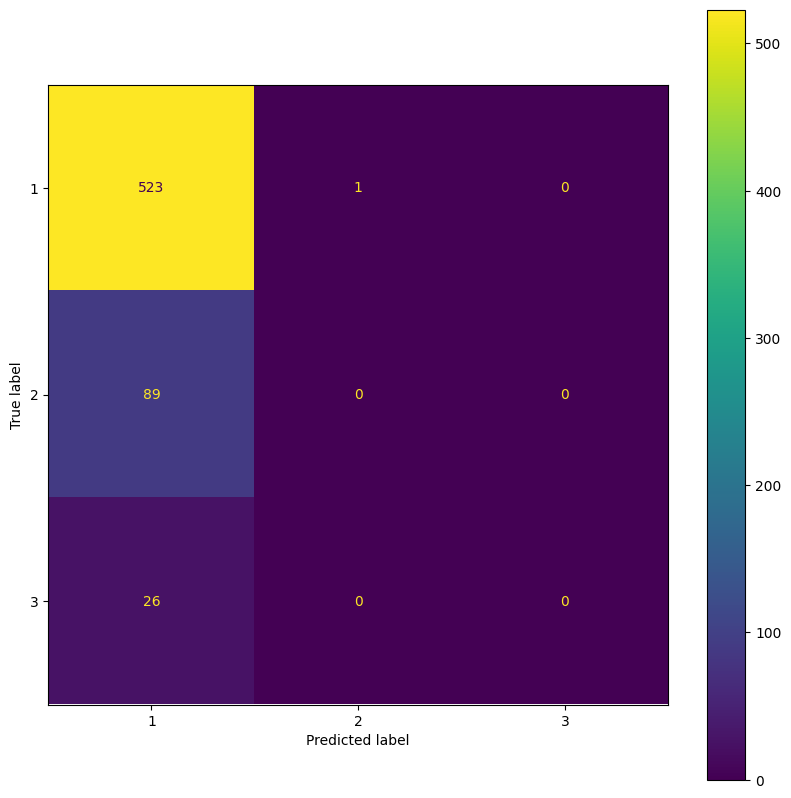

In [133]:
# Print confusion matrix of our result:
disp = ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10)  

# Submitting to the online challenge: ramp.studio


Once you found a good model, you can submit them to ramp.studio to enter the online challenge. First, if it is your first time using the RAMP platform, sign up, otherwise log in. Then sign up to the event tephra. Both signups are controled by RAMP administrators, so there can be a delay between asking for signup and being able to submit.

Once your signup request is accepted, you can go to your sandbox and write the code for your classifier directly on the browser. You can also create a new folder my_submission in the submissions folder containing classifier.py and upload this file directly. You can check the starting-kit (classifier.py) for an example. The submission is trained and tested on our backend in the similar way as ramp-test does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in my submissions. Once it is trained, your submission shows up on the public leaderboard. If there is an error (despite having tested your submission locally with ramp-test), it will show up in the "Failed submissions" table in my submissions. You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., locally, and checking them with ramp-test. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the leaderboard) is the balenced accuracy score (bal_acc). When the score is good enough, you can submit it at the RAMP.

Here is the script proposed as the starting_kit:

In [134]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


class Classifier(BaseEstimator):
    def __init__(self):
        text_column=['blurb']
        cat_column=['name','city','country','chef','cuisine1','cuisine2']
        num_column=['lat','lon']
        #Preprocession for numeric data
        numeric_transformer = Pipeline(
        steps = [
        ("imputer", SimpleImputer(strategy="median")),  
        ("scaler", StandardScaler())  
        ])
        #Preprocession for categorical data
        cat_transformer=Pipeline(
            steps=[
                ("imputer2", SimpleImputer(strategy="most_frequent")),
                ("encoder",OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1))
                ]
        )


        self.preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, num_column),
                ("cat", cat_transformer, cat_column),
            ],remainder='drop' # Here not use the description of the restaurant
        )

        #The first model to beat use a logistic linear regressor
        self.model = LogisticRegression(max_iter=500)
        self.pipe = make_pipeline(self.preprocessor, self.model)

    def fit(self, X, y):
        self.pipe.fit(X, y)

    def predict(self, X):
        return self.pipe.predict(X)

    def predict_proba(self, X):
        return self.pipe.predict_proba(X)

You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>.
Here is an example with the starting_kit submission:

In [135]:
!ramp-test --submission starting_kit

Testing Classification de restaurant au guide Michelin
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
	score  bal_acc    acc      time
	train    0.333  0.804  0.269915
	valid    0.333  0.814  0.019234
	test     0.333  0.820  0.012099
CV fold 1
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I